In [1]:
import torch
import torch.nn as nn
import clip
from PIL import Image
import pandas as pd
import requests
import os.path as osp
import pickle
import random
import numpy as np
from pathlib import Path
import sys

### CLIP always reduce the image to a [3, 244, 244] embedding, so no point in changing image size

In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [4]:
def image_path(uid):
    return osp.join(image_storage, f"{uid}.jpg")

In [2]:
dataset_path = "C:/Users/aphri/Documents/t0002/work/data/w210_data/target_store_furniture_datasets.csv"
image_storage = "C:/Users/aphri/Documents/t0002/work/data/w210_data/target_images"
pickle_path = "C:/Users/aphri/Documents/t0002/work/data/w210_data/pickle"
model_path = "C:/Users/aphri/Documents/t0002/work/data/w210_data/model"

Path(image_storage).mkdir(parents=True, exist_ok=True)
Path(pickle_path).mkdir(parents=True, exist_ok=True)
Path(model_path).mkdir(parents=True, exist_ok=True)

In [3]:
d1 = pd.read_csv(dataset_path)

In [8]:
uid = d1.iloc[0]["uniq_id"]
path = image_path(uid)

In [10]:
image = Image.open(path)

In [13]:
image.height

400

In [14]:
image.width

400

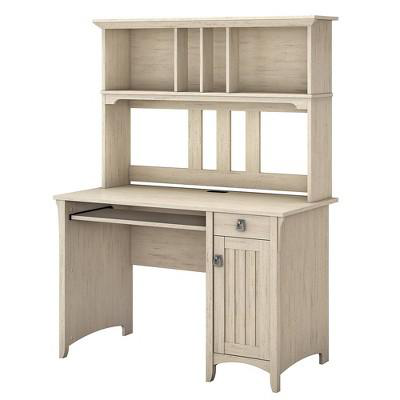

In [15]:
image

In [19]:
encoded_image = preprocess(image).unsqueeze(0)

In [21]:
encoded_image.shape

torch.Size([1, 3, 224, 224])

In [22]:
image2 = Image.open("test_images/bright_green_hat_with_beige_sea_shell.png")

In [25]:
image2.width

256

In [26]:
image2.height

256

In [23]:
encoded_image2 = preprocess(image2).unsqueeze(0)

In [24]:
encoded_image2.shape

torch.Size([1, 3, 224, 224])